## **Project: Customer Segmentation using K-Means Clustering**

Done By : *`Mr. Aridweep Majumder, M.Tech`*

This project applies K-Means clustering to a marketing dataset to segment customers based on demographics and purchase behavior.  

**Dataset source**: *marketing_campaign.csv*

**Tools used**: *Python, Pandas, Matplotlib, Seaborn, Scikit-learn*

# 1. Importing Necessary Libraries & Load Datasets

In [ ]:
# Basic imports for analysis and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Enable inline plots
%matplotlib inline

# Load the dataset (already uploaded to Colab)
df = pd.read_csv('/content/marketing_campaign.csv')

# Check shape and preview
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")
df.head(3)

Total Rows: 2240
Total Columns: 29


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0


#2. Data Overview & Summary

In [ ]:
# Quick look at column types and names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Listing all columns
print("Columns:")
print(df.columns.tolist())

Columns:
['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


In [ ]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [ ]:
# Basic statistical summary
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


#3. Data Cleaning and Preprocessing

In [ ]:
data = df.copy() # Make a copy to avoid modifying the original dataframe

data.isnull().sum() # Checking again for missing values

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
# 'Income' has some missing values – dropping those rows
data = data.dropna(subset=['Income'])

# Convert 'Dt_Customer' to datetime format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

# Create a new feature: year the customer joined
data['Customer_Year'] = data['Dt_Customer'].dt.year


# Create a new feature: year the customer joined
data['Customer_Year'] = data['Dt_Customer'].dt.year


# Drop unused or duplicate columns for clustering
data = data.drop(['ID', 'Dt_Customer'], axis=1)

/tmp/ipython-input-139-3013036707.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
/tmp/ipython-input-139-3013036707.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Customer_Year'] = data['Dt_Customer'].dt.year
/tmp/ipython-input-139-3013036707.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [ ]:
# Convert 'Education' and 'Marital_Status' to numeric using one-hot encoding
data = pd.get_dummies(data, columns=['Education', 'Marital_Status'], drop_first=True)

# Convert all boolean columns to integer (so True/False becomes 1/0)
data = data.astype(int)# Final structure check
print(f"Data shape after cleaning: {data.shape}")
data.head(4)

Data shape after cleaning: (2216, 37)


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138,0,0,58,635,88,546,172,88,...,1,0,0,0,0,0,1,0,0,0
1,1954,46344,1,1,38,11,1,6,2,1,...,1,0,0,0,0,0,1,0,0,0
2,1965,71613,0,0,26,426,49,127,111,21,...,1,0,0,0,0,0,0,1,0,0
3,1984,26646,1,0,26,11,4,20,10,3,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
# Final structure check
print(f"Data shape after cleaning: {data.shape}")
data.head()

Data shape after cleaning: (2216, 37)


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138,0,0,58,635,88,546,172,88,...,1,0,0,0,0,0,1,0,0,0
1,1954,46344,1,1,38,11,1,6,2,1,...,1,0,0,0,0,0,1,0,0,0
2,1965,71613,0,0,26,426,49,127,111,21,...,1,0,0,0,0,0,0,1,0,0
3,1984,26646,1,0,26,11,4,20,10,3,...,1,0,0,0,0,0,0,1,0,0
4,1981,58293,1,0,94,173,43,118,46,27,...,0,0,1,0,0,1,0,0,0,0


#4. Feature Selection for Clustering

In [ ]:
# Selecting numerical features for clustering
features = data.copy()

# Standardizing the data to bring all features to the same scale
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert back to DataFrame for easier inspection if needed
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

scaled_df.head(4)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,-0.986443,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,0.992806,-0.444062,-0.52653,-0.036819,-0.341958,-0.79411,1.924807,-0.590553,-0.188452,-0.030056
1,-1.236801,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,0.992806,-0.444062,-0.52653,-0.036819,-0.341958,-0.79411,1.924807,-0.590553,-0.188452,-0.030056
2,-0.318822,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,0.992806,-0.444062,-0.52653,-0.036819,-0.341958,-0.79411,-0.519533,1.693329,-0.188452,-0.030056
3,1.266777,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,0.992806,-0.444062,-0.52653,-0.036819,-0.341958,-0.79411,-0.519533,1.693329,-0.188452,-0.030056


#5. Finding Optimal Clusters (Elbow Method)

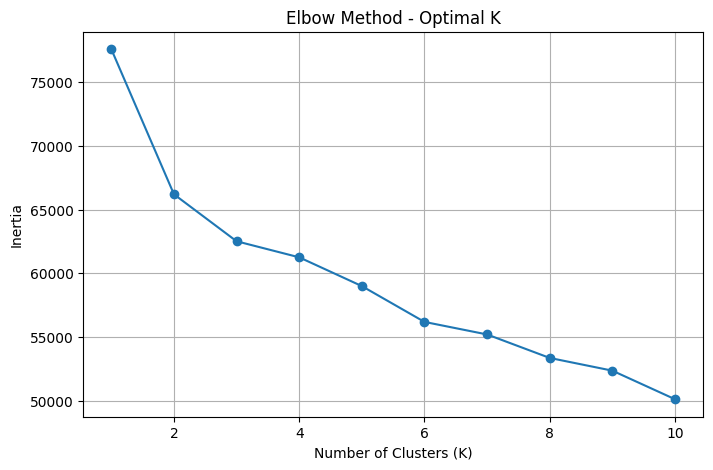

In [ ]:
# Trying different values of K to see where inertia drops sharply
inertia = []
k_range = range(1, 11)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_df)
    inertia.append(model.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#6. Apply K-Means Clustering & Visualize Clusters

In [ ]:
# Let's choose 4 clusters (you can change this based on the elbow plot)
k = 4

# Fit the model
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

# Add cluster labels to original data
data['Cluster'] = clusters

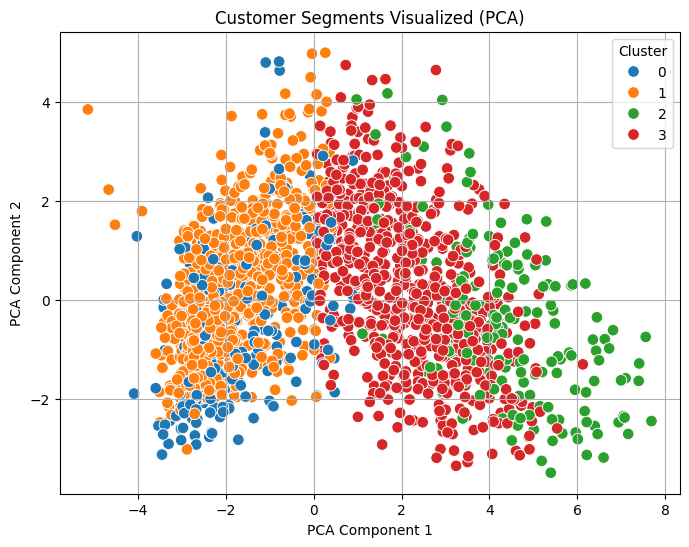

In [ ]:
# Visualizing clusters using PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)


# DataFrame for plotting
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=70)
plt.title('Customer Segments Visualized (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

#7. Cluster Analysis

In [ ]:
# Mean profile of each cluster
cluster_profile = data.groupby('Cluster').mean(numeric_only=True).round(2)
cluster_profile.T  # Transposed for easier reading

Cluster,0,1,2,3
Year_Birth,1972.44,1969.62,1969.09,1966.21
Income,37261.54,38559.86,81055.89,69113.32
Kidhome,0.71,0.71,0.05,0.07
Teenhome,0.48,0.56,0.15,0.53
Recency,47.41,49.10,48.05,49.79
MntWines,92.84,96.33,863.22,524.26
MntFruits,7.75,5.82,55.62,53.81
MntMeatProducts,38.91,34.30,465.02,318.65
MntFishProducts,9.99,8.91,82.08,75.77
MntSweetProducts,7.36,5.84,64.61,53.59


In [ ]:
# Number of customers in each cluster
cluster_counts = data['Cluster'].value_counts().sort_index()
print("Number of customers per cluster:")
print(cluster_counts)

Number of customers per cluster:
Cluster
0    294
1    993
2    195
3    734
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

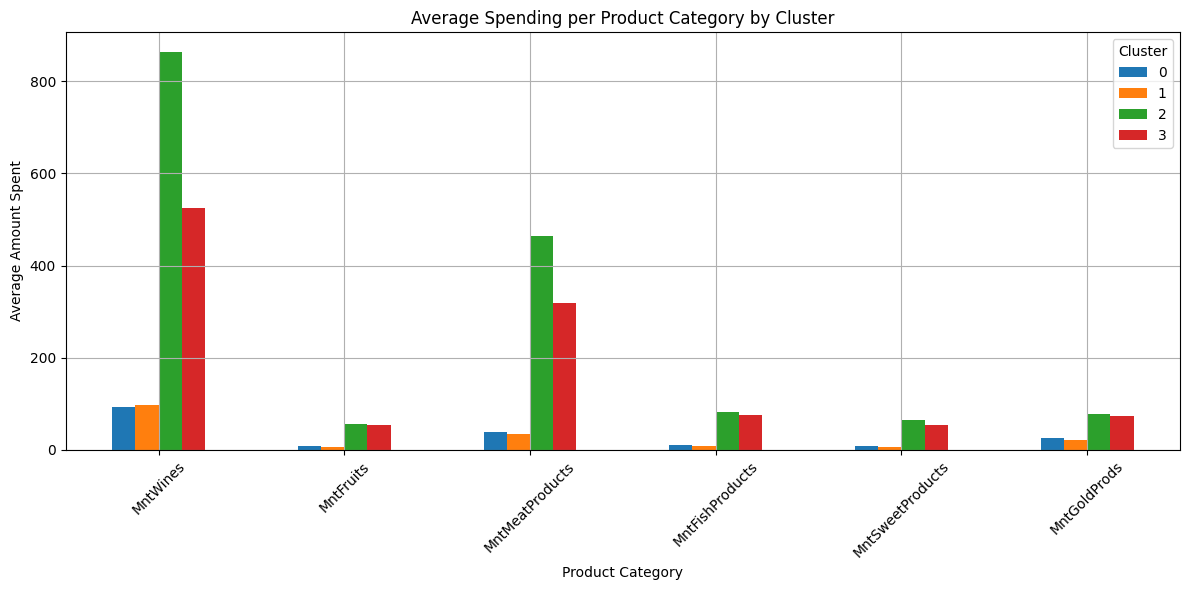

In [ ]:
# Visualize average spending per cluster
spending_features = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

avg_spending = data.groupby('Cluster')[spending_features].mean()

plt.figure(figsize=(10, 6))
avg_spending.T.plot(kind='bar', figsize=(12, 6))
plt.title('Average Spending per Product Category by Cluster')
plt.xlabel('Product Category')
plt.ylabel('Average Amount Spent')
plt.xticks(rotation=45)
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-149-3784089105.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Cluster', y='Income', palette='Pastel1')


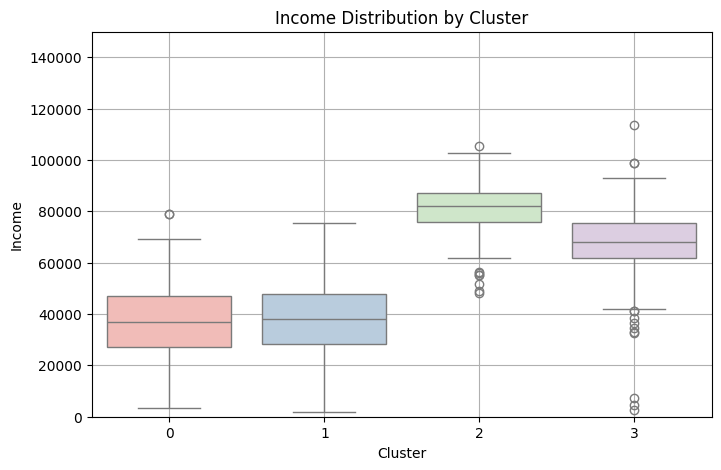

In [ ]:

# Comparing income distribution by cluster visual
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Cluster', y='Income', palette='Pastel1')
plt.title('Income Distribution by Cluster')
plt.ylim(0, 150000)  # Adjustable the upper limit as needed
plt.grid(True)
plt.show()

/tmp/ipython-input-150-486649454.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Cluster', y='NumWebPurchases', ci=None, palette='Set3')
/tmp/ipython-input-150-486649454.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Cluster', y='NumWebPurchases', ci=None, palette='Set3')


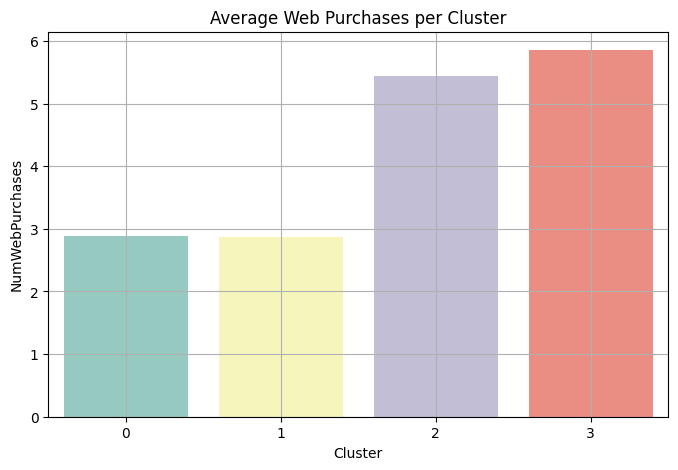

In [ ]:
#Cluster vs Web Activity
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='Cluster', y='NumWebPurchases', ci=None, palette='Set3')
plt.title('Average Web Purchases per Cluster')
plt.grid(True)
plt.show()

#7. Final Cluster Analysis Summary

## Final Cluster Analysis Summary

After applying K-Means clustering and analyzing the results, I found that the customers were grouped into 4 distinct clusters. Here's what I observed about each one based on their income, spending, and online behavior:


###  Cluster 0: Budget-Conscious Shoppers
- Lower income group.
- Spend the least across all product categories.
- Moderate online purchases.
- They seem to be careful with spending and prefer affordable options.


### Cluster 1: Low Engagement Segment
- Income is similar to Cluster 0.
- Very low spending on all products.
- Least number of web purchases.
- This group might not be very interested or engaged with the brand.


### Cluster 2: High-Value Customers
- Highest income among all clusters.
- Spend the most on expensive items like wine, meat, and gold products.
- Very active in online purchases.
- Likely to be loyal customers and a key group for premium marketing campaigns.


### Cluster 3: Active and Digital Buyers
- Income is quite good (but not the highest).
- Spend well on almost every product.
- Highest number of web purchases.
- These customers are very active and seem comfortable with online shopping.


## What I Learned:
- Clusters 2 and 3 are the most valuable and active; they should be prioritized for offers, loyalty programs, and marketing.
- Clusters 0 and 1 are smaller spenders, but still important. Maybe they can be targeted through discounts or bundle offers.
- Customer segmentation really helped break down the data and understand who buys what — and how the business can focus on different groups better.

#8. Save final dataset with cluster labels to CSV

In [ ]:
data.to_csv('Customer_Segments_KMeans.csv', index=False)
print("File saved as 'Customer_Segments_KMeans.csv'")

File saved as 'Customer_Segments_KMeans.csv'
